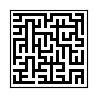

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os

class UnionFind:
    def __init__(self, n):
        self.parent = list(range(n))
        self.rank = [0] * n

    def find(self, u):
        if self.parent[u] != u:
            self.parent[u] = self.find(self.parent[u])
        return self.parent[u]

    def union(self, u, v):
        root_u = self.find(u)
        root_v = self.find(v)
        if root_u != root_v:
            if self.rank[root_u] > self.rank[root_v]:
                self.parent[root_v] = root_u
            elif self.rank[root_u] < self.rank[root_v]:
                self.parent[root_u] = root_v
            else:
                self.parent[root_v] = root_u
                self.rank[root_u] += 1

def generate_maze(size):
    uf = UnionFind(size * size)
    edges = []

    for i in range(size):
        for j in range(size):
            if i < size - 1:
                edges.append((i * size + j, (i + 1) * size + j))
            if j < size - 1:
                edges.append((i * size + j, i * size + (j + 1)))

    random.shuffle(edges)

    maze = np.zeros((size * 2 + 1, size * 2 + 1), dtype=int)
    maze[1::2, 1::2] = 1

    for u, v in edges:
        if uf.find(u) != uf.find(v):
            uf.union(u, v)
            ux, uy = divmod(u, size)
            vx, vy = divmod(v, size)
            maze[ux + vx + 1, uy + vy + 1] = 1

    return maze

def plot_maze(maze):
    plt.figure(figsize=(1, 1))
    plt.imshow(maze, cmap='binary')
    plt.xticks([]), plt.yticks([])  # Hide the axis
    plt.show()

size = 12
maze = generate_maze(size)
plot_maze(maze)


In [53]:
import os

# Ensure the folder exists
output_folder = "maze_maps1"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Function to save maze images
def save_mazes(num_mazes, size, folder):
    for i in range(num_mazes):
        maze = generate_maze(size)
        plt.figure(figsize=(1, 1))
        plt.imshow(maze, cmap='binary')
        plt.xticks([]), plt.yticks([])  # Hide the axis
        # maze = maze.resize((100, 100), Image.NEAREST)  # Resize to 100x100 pixels
        plt.savefig(os.path.join(folder, f"maze_{i+1}.png"))
        plt.close()

# Generate and save 100 maze images

number_of_mazes = 100

save_mazes(number_of_mazes, size, output_folder)


In [54]:
import os
from PIL import Image

# Ensure the output directory exists
output_dir = 'maze_maps2'
os.makedirs(output_dir, exist_ok=True)

def save_maze_image(maze, path):
    img_size = (maze.shape[0], maze.shape[1])
    img = Image.fromarray(np.uint8(maze * 255), 'L')
    img = img.resize((100, 100), Image.NEAREST)  # Resize to 100x100 pixels
    img.save(path)

# Generate and save number_of_images maze images
number_of_images = 10
for i in range(number_of_images):
    maze = generate_maze(size)
    image_path = os.path.join(output_dir, f'maze_{i + 1}.png')
    save_maze_image(maze, image_path)

print(f"'{number_of_images}' maze images have been saved in the '{output_dir}' folder.")


'10' maze images have been saved in the 'maze_maps2' folder.
